In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import yfinance as yf
import numpy as np
import datetime as dt


In [2]:
data = yf.download("SPY AAPL", start="2017-01-01", end="2021-02-28")

l=[]
for i in range(90):
    data[('shifted%i'%i,'AAPL')]=data['Close']['AAPL'].shift(i+1)
    l.append(np.corrcoef(data['shifted%i'%i]['AAPL'].iloc[-90:],data['Close']['AAPL'].iloc[-90:])[0][1])


[*********************100%***********************]  2 of 2 completed


In [3]:
dt.datetime.today()

datetime.datetime(2021, 3, 1, 23, 52, 11, 439499)

<AxesSubplot:title={'center':'last 90 days correlation w.r.t days shifted'}, xlabel='nb days shifted'>

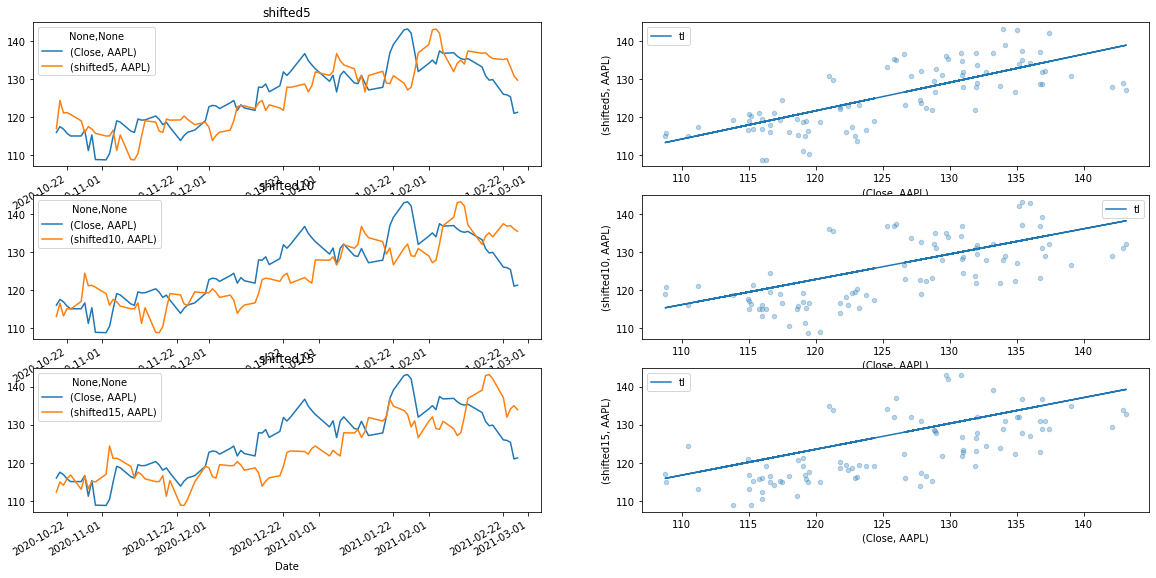

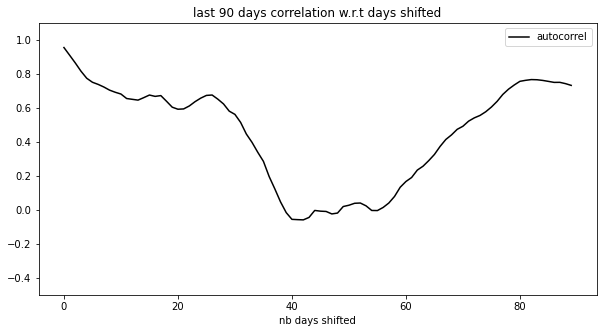

In [12]:
df= pd.DataFrame({'autocorrel':l})

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
shifts=[5,10,15]
fig,axs= plt.subplots(len(shifts),2, figsize=(20,10))
for k,i in enumerate(shifts):
    #print(k,i)
    X=data.iloc[-90:][('shifted%i'%i,'AAPL')]
    y=data.iloc[-90:][('Close','AAPL')]
    data.iloc[-90:][[('Close','AAPL'),('shifted%i'%i,'AAPL')]].plot(ax=axs[k][0],title="shifted%i"%i)
    data.iloc[-90:].plot(kind='scatter',x=('Close','AAPL'), y=('shifted%i'%i,'AAPL'),ax=axs[k][1],alpha=0.3) 
    regression = regr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))
    #print(regression.predict(X.values.reshape(-1,1)).reshape(1,-1))
    trendln = pd.DataFrame({'tl':regression.predict(X.values.reshape(-1,1)).reshape(1,-1)[0]},index=X.values)
    trendln.plot(ax=axs[k][1])

fig,axs= plt.subplots(figsize=(10,5))
axs.set_ylim(-0.5,1.1)
df.plot(ax=axs,color="black",title="last 90 days correlation w.r.t days shifted",xlabel="nb days shifted")
    
